In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
df=pd.read_csv("2019.csv")

In [70]:
df.sample(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
21,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151
116,117,Iran,4.548,1.100,0.842,0.785,0.305,0.270,0.125
69,70,Serbia,5.603,1.004,1.383,0.854,0.282,0.137,0.039
45,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006
118,119,Georgia,4.519,0.886,0.666,0.752,0.346,0.043,0.164


<hr>

### __NOMER 1__

In [69]:
dfNum = df.drop(["Overall rank","Country or region"],axis=1)

In [39]:
# median,mean,modus
mean = dfNum.mean()
median = dfNum.median()
modus = dfNum.mode()

In [67]:
# Range, Q1, Q3 dan IQR
jarak = dfNum.describe().loc["max"]-dfNum.describe().loc["min"]
q1 = dfNum.describe().loc["25%"]
q3 = dfNum.describe().loc["75%"]
iqr = q3-q1

In [106]:
# Standard Deviasi & Variance
std = dfNum.describe().loc["std"]
var = dfNum.describe().loc["std"]**2

In [58]:
dfNum.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


<HR>

### NOMER 2

In [92]:
#IQR
outBawah = q1 - (1.5*iqr)
outAtas = q3 + (1.5*iqr)

In [87]:
# Z-Score
for i in dfNum:
    dfNum[f"z-{i}"]=(dfNum[i]-dfNum[i].mean())/dfNum[i].std()
ho = mean + 2.5 * std
lo = mean + 2.5 * std

<HR>

### NOMER 3

In [115]:
dfNum.columns

Index(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'z-Score', 'z-GDP per capita',
       'z-Social support', 'z-Healthy life expectancy',
       'z-Freedom to make life choices', 'z-Generosity',
       'z-Perceptions of corruption'],
      dtype='object')

In [235]:
dfNum_wz=dfNum[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

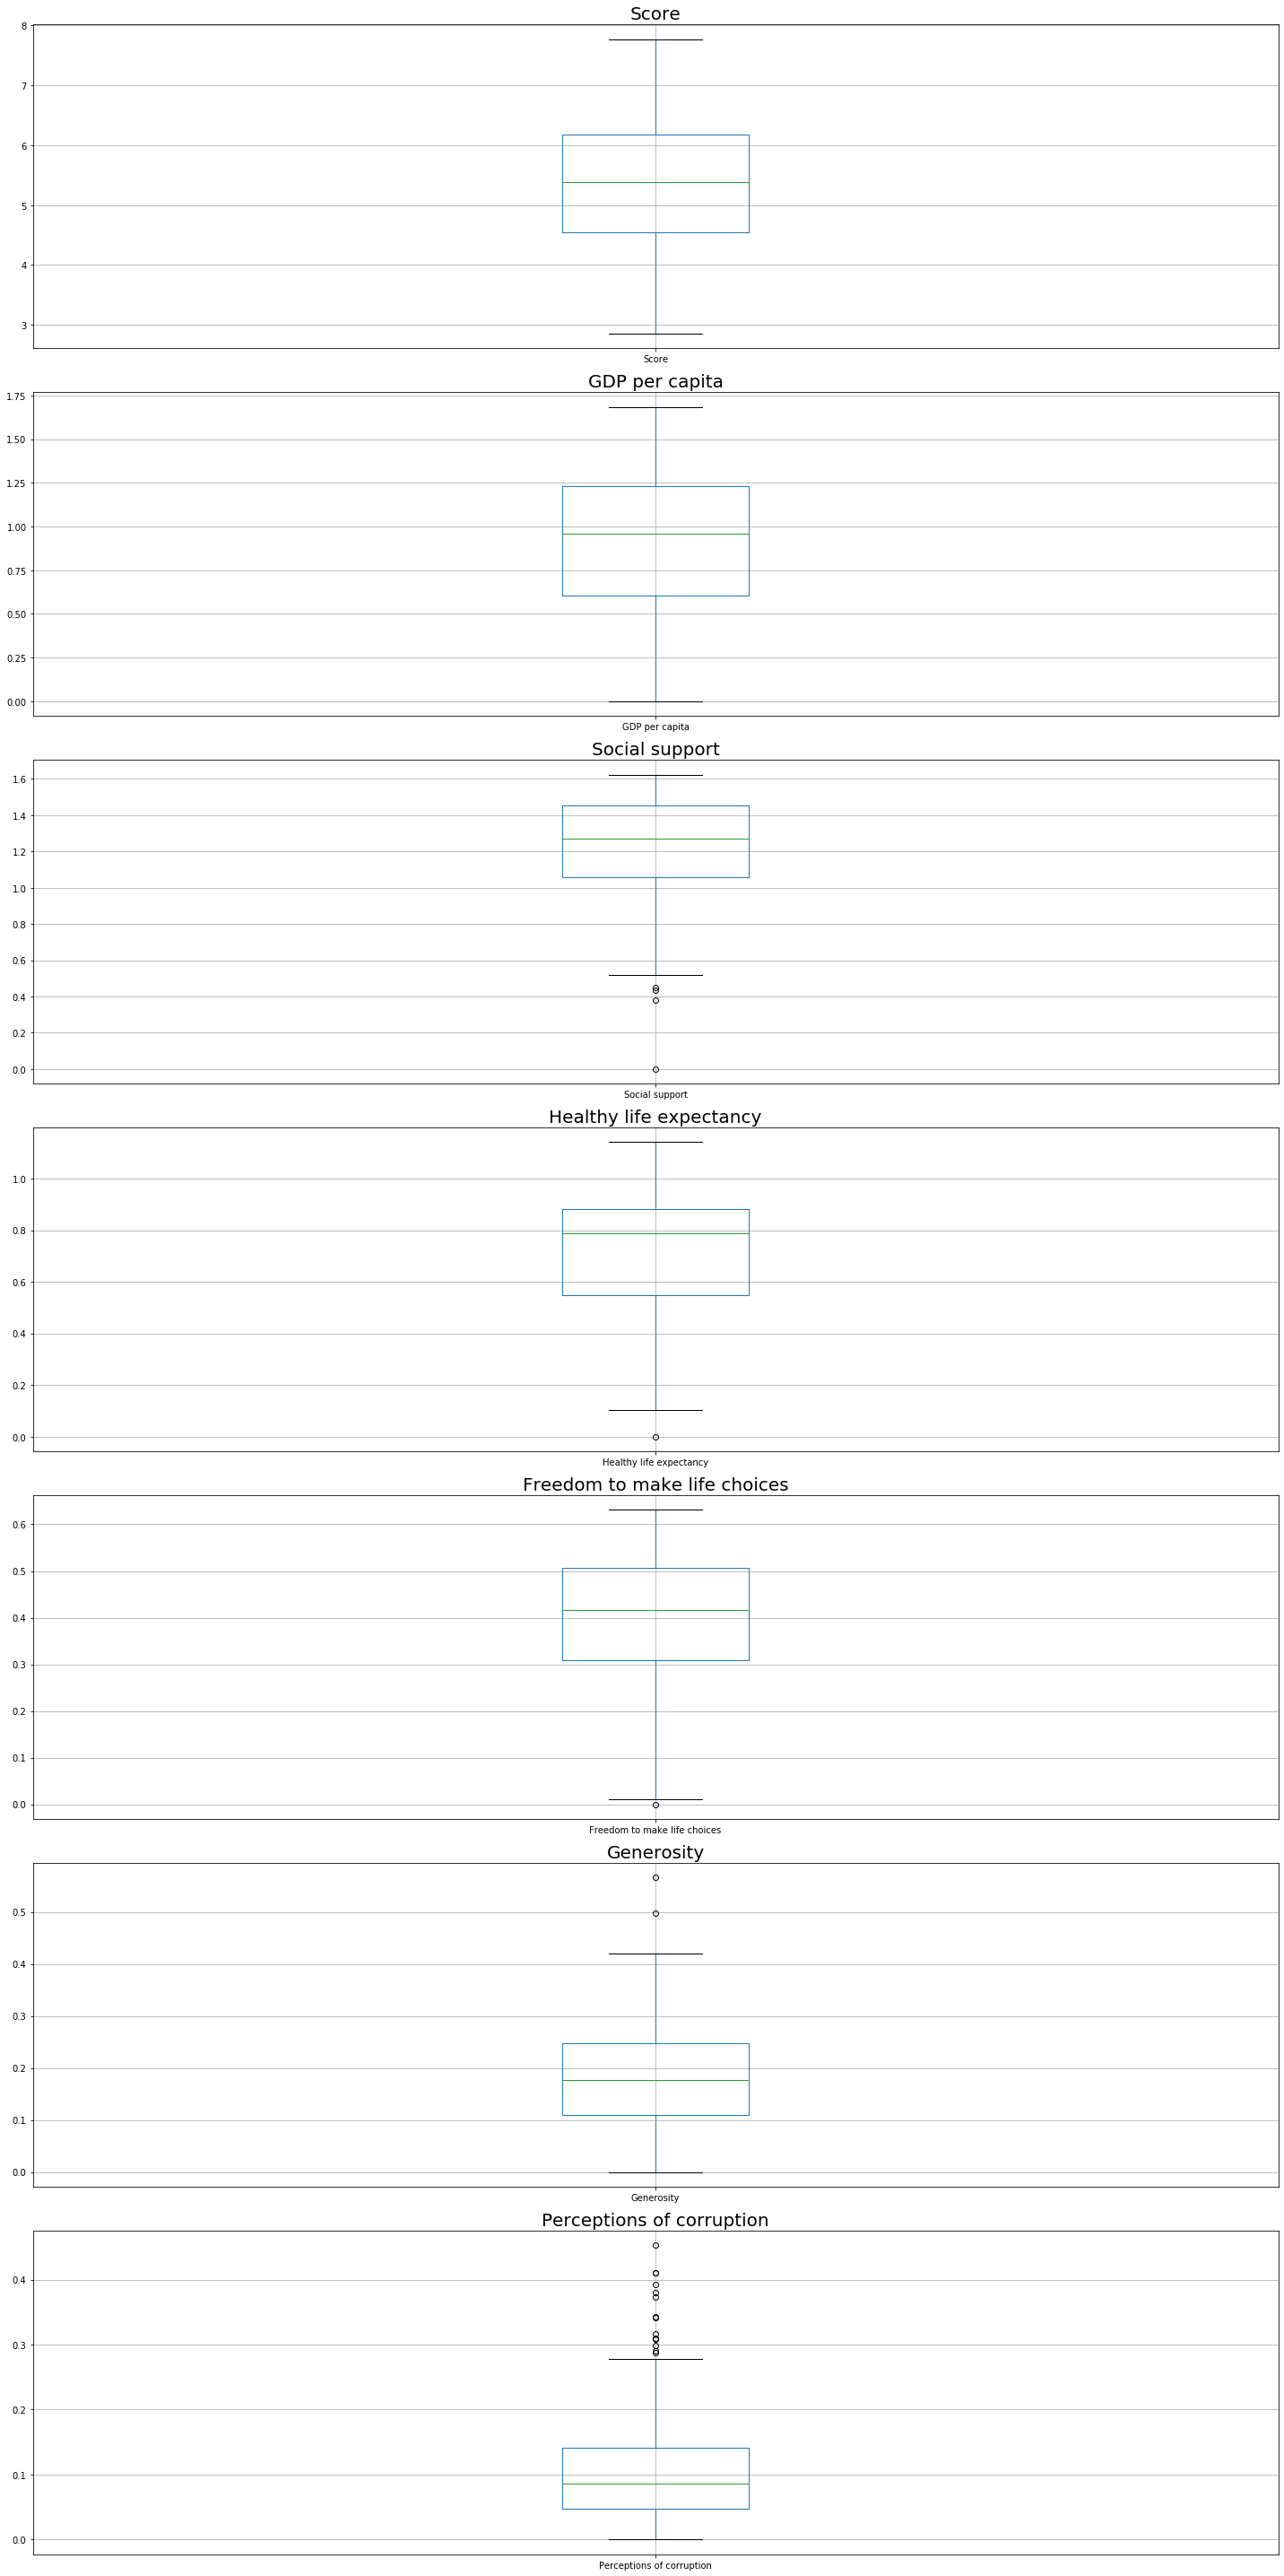

In [239]:
#BOX PLOT
def box(kolom):
    dfNum_wz[[kolom]].boxplot()
    plt.title(kolom,size=20)
    plt.tight_layout()

plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
box("Score")
plt.subplot(7,1,2)
box("GDP per capita")
plt.subplot(7,1,3)
box("Social support")
plt.subplot(7,1,4)
box("Healthy life expectancy")
plt.subplot(7,1,5)
box("Freedom to make life choices")
plt.subplot(7,1,6)
box("Generosity")
plt.subplot(7,1,7)
box("Perceptions of corruption")

In [231]:
#Histogram
def hist(kolom):
    dfNum_wz[kolom].hist()
    plt.title(kolom,size=20)
    plt.tight_layout()

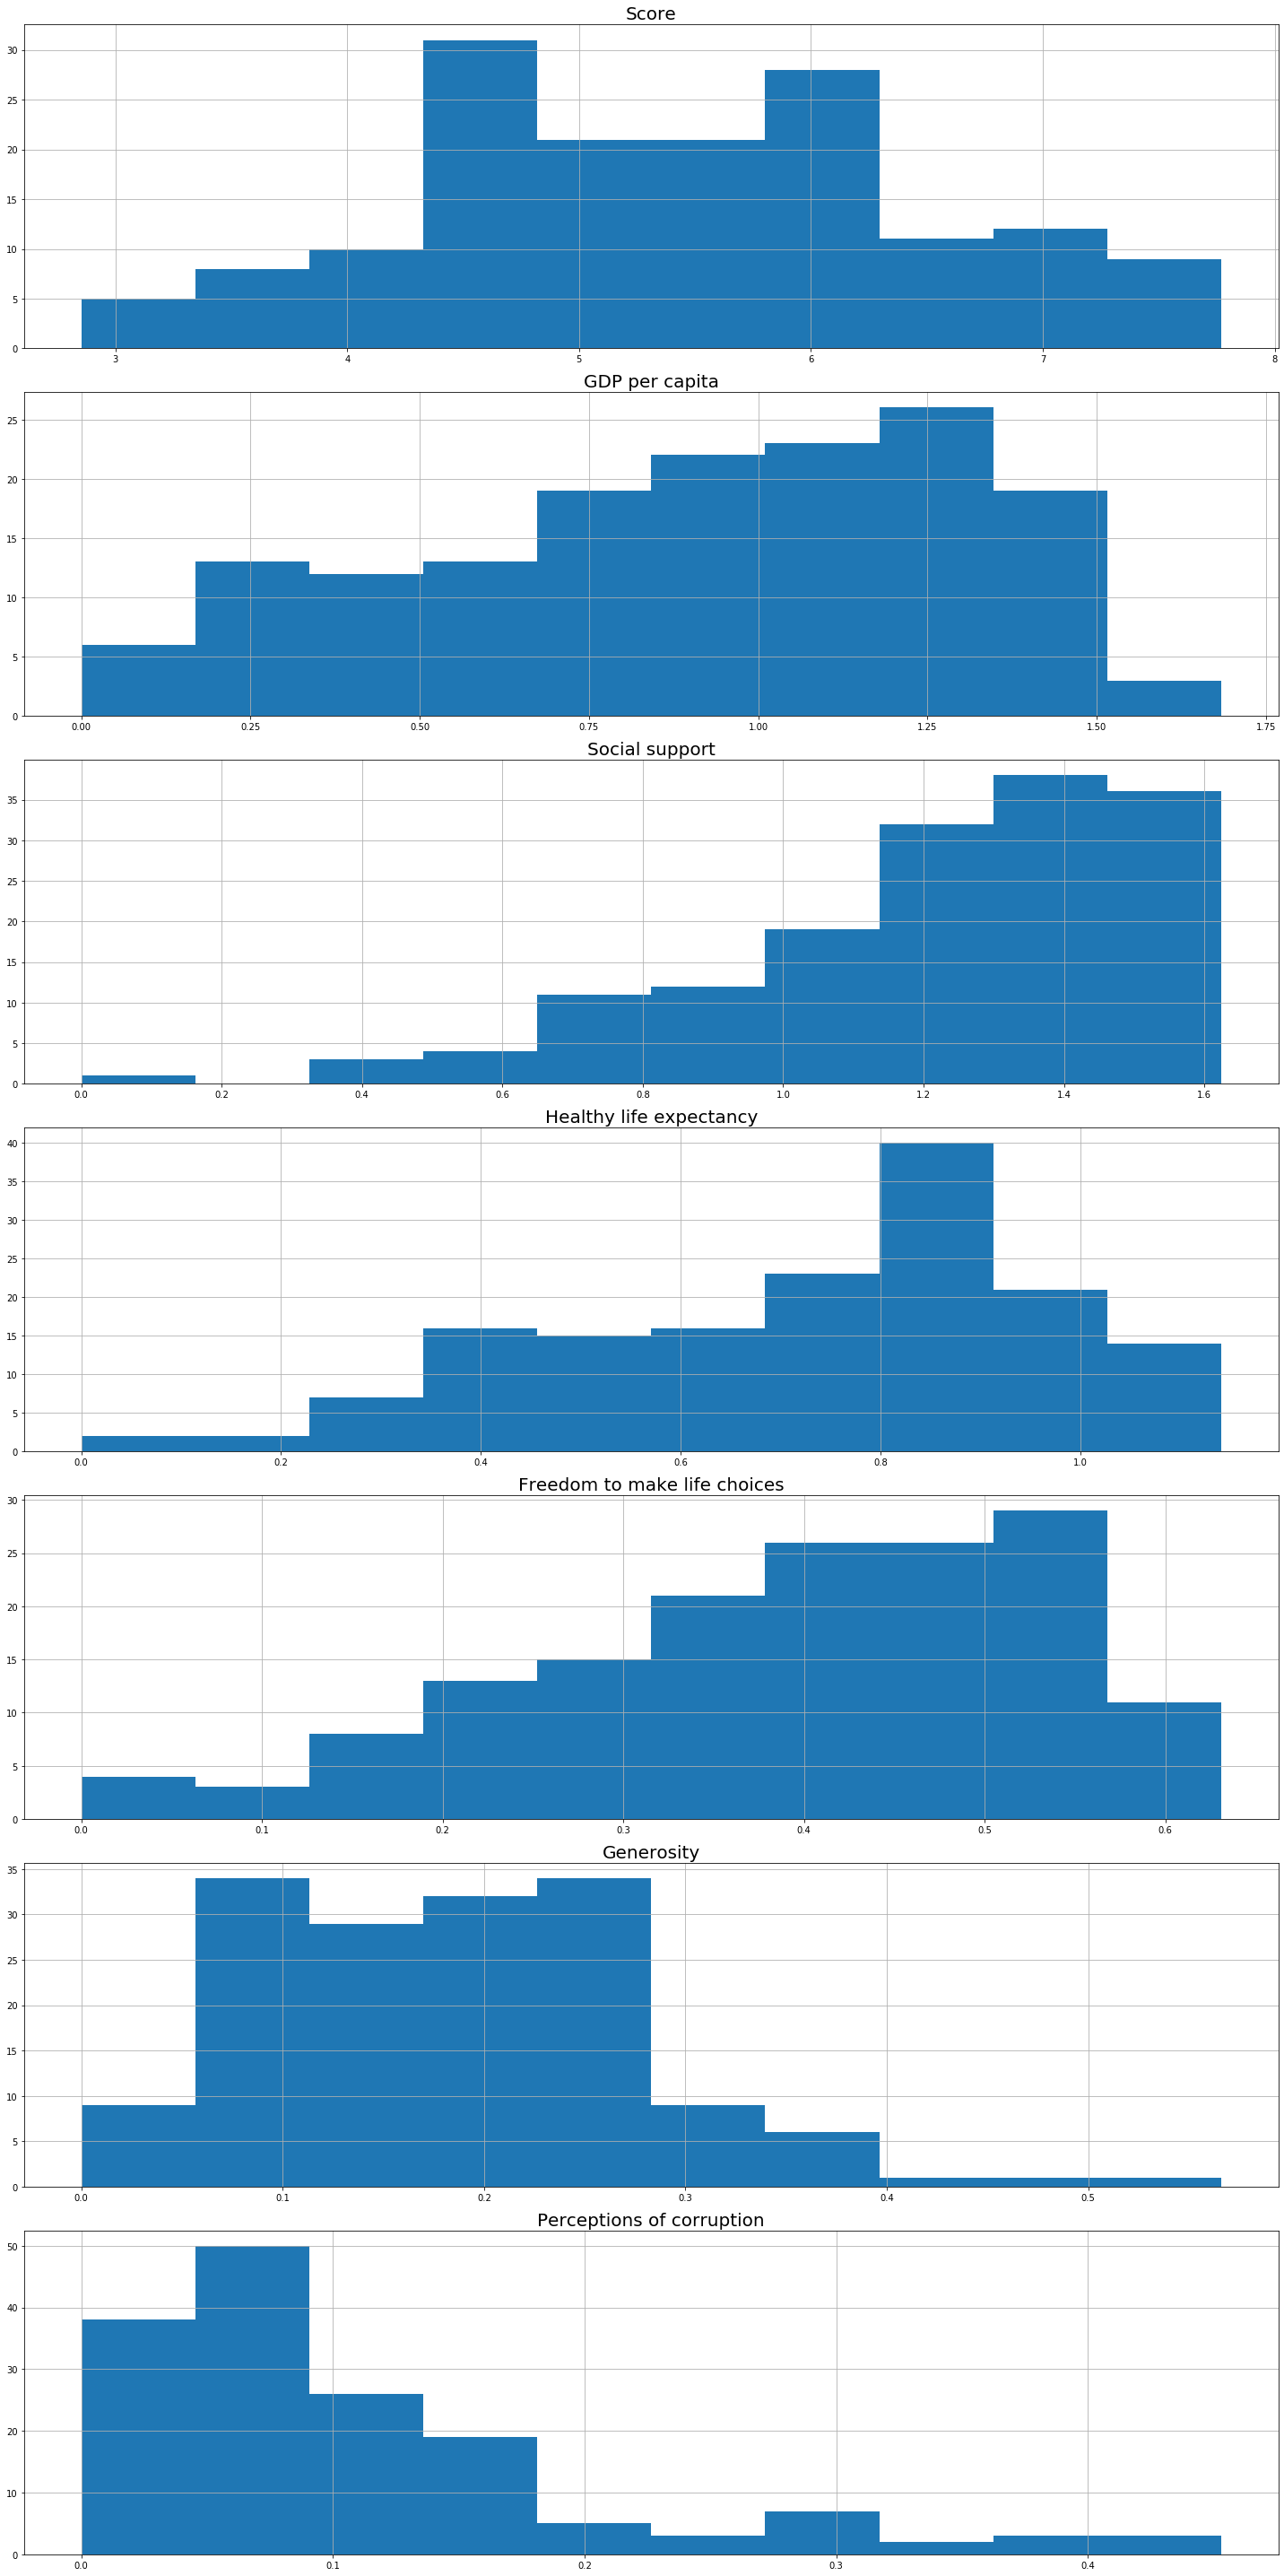

In [232]:
plt.figure(figsize=(20,40))
plt.subplot(7,1,1)
hist("Score")
plt.subplot(7,1,2)
hist("GDP per capita")
plt.subplot(7,1,3)
hist("Social support")
plt.subplot(7,1,4)
hist("Healthy life expectancy")
plt.subplot(7,1,5)
hist("Freedom to make life choices")
plt.subplot(7,1,6)
hist("Generosity")
plt.subplot(7,1,7)
hist("Perceptions of corruption")

### NOMER 4

In [189]:
# Covariance
cova = dfNum_wz.cov()["Score"]
cova

Score                           1.239036
GDP per capita                  0.352052
Social support                  0.258788
Healthy life expectancy         0.210189
Freedom to make life choices    0.090394
Generosity                      0.008040
Perceptions of corruption       0.040579
Name: Score, dtype: float64

In [190]:
# Pearson
pear=dfNum_wz.corr(method="pearson")["Score"]
pear

Score                           1.000000
GDP per capita                  0.793883
Social support                  0.777058
Healthy life expectancy         0.779883
Freedom to make life choices    0.566742
Generosity                      0.075824
Perceptions of corruption       0.385613
Name: Score, dtype: float64

In [191]:
# Spearman
spea=dfNum_wz.corr(method="spearman")["Score"]
spea

Score                           1.000000
GDP per capita                  0.814483
Social support                  0.816181
Healthy life expectancy         0.807275
Freedom to make life choices    0.551974
Generosity                      0.070483
Perceptions of corruption       0.217348
Name: Score, dtype: float64

In [192]:
# Kendall
kend=dfNum_wz.corr(method="kendall")["Score"].transpose()
kend

Score                           1.000000
GDP per capita                  0.619993
Social support                  0.616792
Healthy life expectancy         0.602613
Freedom to make life choices    0.394203
Generosity                      0.043759
Perceptions of corruption       0.140974
Name: Score, dtype: float64

<hr>

### SOAL 5

<BarContainer object of 10 artists>

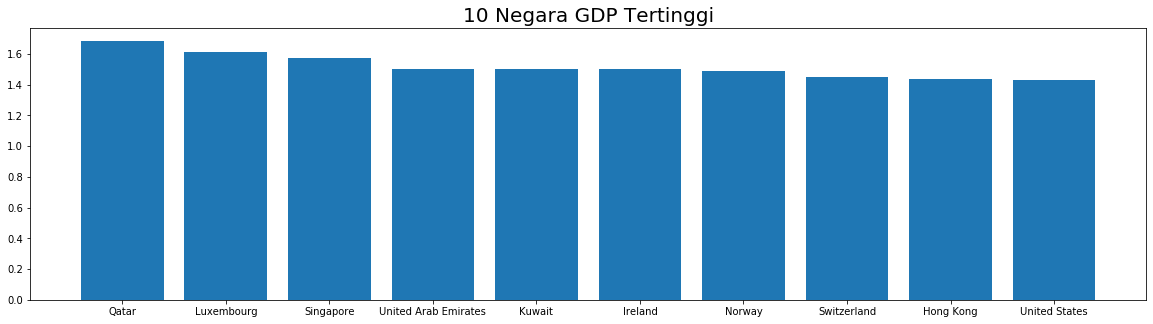

In [217]:
# 10 Negara dengan GDP per capita tertinggi
negGDP=df.sort_values("GDP per capita",ascending=False).head(10)[["Country or region", "GDP per capita"]]
plt.figure(figsize=(20,5))
plt.title("10 Negara GDP Tertinggi",size=20)
plt.bar(height="GDP per capita",x="Country or region",data=negGDP)

<BarContainer object of 10 artists>

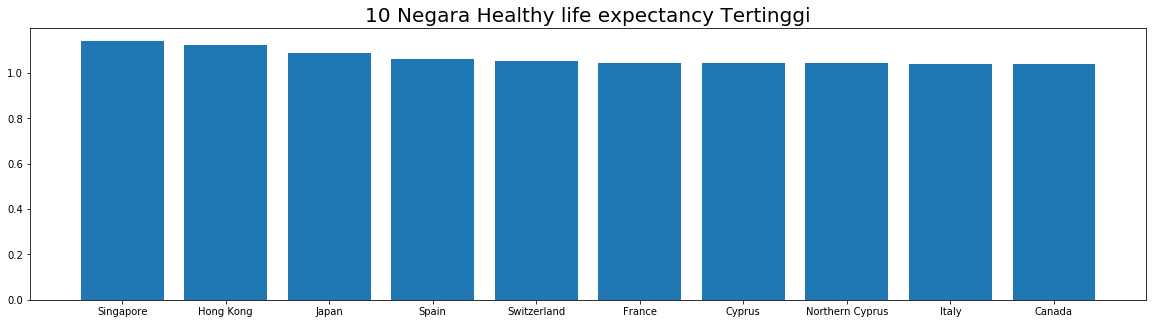

In [222]:
# 10 Negara dengan Healthy life expectancy tertinggi
negHLP=df.sort_values("Healthy life expectancy",ascending=False).head(10)[["Country or region", "Healthy life expectancy"]]
plt.figure(figsize=(20,5))
plt.title("10 Negara Healthy life expectancy Tertinggi",size=20)
plt.bar(height="Healthy life expectancy",x="Country or region",data=negHLP)

In [219]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

<BarContainer object of 10 artists>

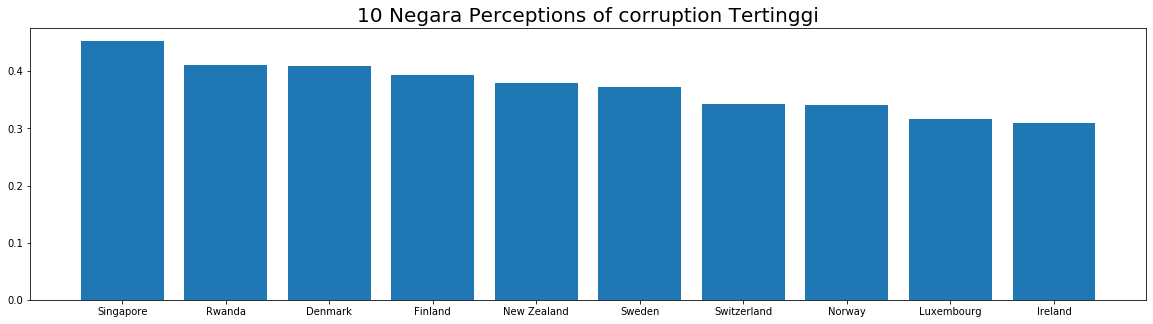

In [223]:
# 10 Negara dengan Perceptions of corruption tertinggi
negPOC=df.sort_values("Perceptions of corruption",ascending=False).head(10)[["Country or region", "Perceptions of corruption"]]
plt.figure(figsize=(20,5))
plt.title("10 Negara Perceptions of corruption Tertinggi",size=20)
plt.bar(height="Perceptions of corruption",x="Country or region",data=negPOC)